In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

In [2]:
df=pd.read_csv('temperature.csv')
df=pd.DataFrame(df) 

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.keys()

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

We have the columns names as seen above from keys.

In [5]:
df.shape

(7752, 25)

We have data of dimension 7752 rows and 25 columns.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


We have data in float and object type, 24 columns have float data and Date column have object data type.

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We have lot of data missing in almost all the columns except lat, lon, DEM, Slope, Solar radiation and Slope.

In [8]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


We observe the infromation regarding the mean, minimum, maximum, count data present in data set. We understand the percentage wise count of data set.

# EDA

In [9]:
df["station"].value_counts()

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64

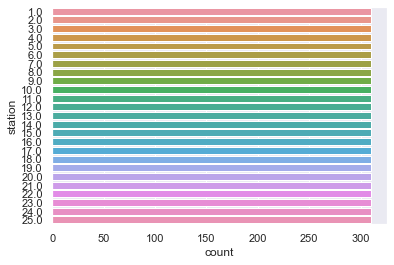

In [10]:
sns.countplot(y='station', data= df)

We in total have 25 stations with 310 reading count.

In [11]:
df["Present_Tmax"].value_counts()

31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64

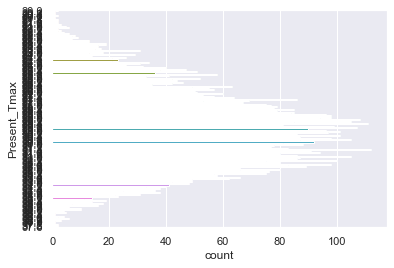

In [12]:
sns.countplot(y='Present_Tmax',data=df)

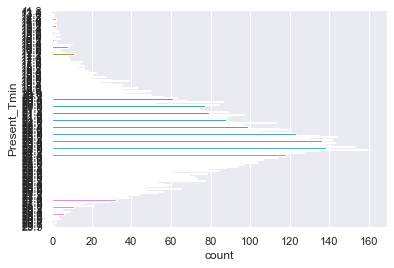

In [13]:
sns.countplot(y='Present_Tmin',data=df)

In [14]:
df["LDAPS_RHmin"].value_counts()

51.810596    2
71.658089    2
77.030350    2
98.524734    2
19.794666    2
            ..
44.005089    1
58.655628    1
58.761993    1
42.186558    1
71.359451    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64

In [15]:
df["LDAPS_RHmax"].value_counts()

58.936283    2
96.525200    2
91.776146    2
88.876610    2
92.531029    2
            ..
83.450928    1
91.301826    1
82.626305    1
80.657700    1
83.073624    1
Name: LDAPS_RHmax, Length: 7664, dtype: int64

In [16]:
df["LDAPS_Tmin_lapse"].value_counts()

14.272646    2
29.619342    2
21.797430    1
25.681776    1
24.143785    1
            ..
22.562532    1
20.332596    1
27.344587    1
25.081030    1
23.197572    1
Name: LDAPS_Tmin_lapse, Length: 7675, dtype: int64

In [17]:
df["LDAPS_WS"].value_counts()

2.882580     2
21.857621    2
4.633030     1
10.157699    1
5.145232     1
            ..
4.818516     1
13.419236    1
10.352374    1
5.738173     1
8.112974     1
Name: LDAPS_WS, Length: 7675, dtype: int64

In [18]:
df["LDAPS_LH"].value_counts()

-13.603212     2
 213.414006    2
 31.292903     1
 52.898936     1
 58.594891     1
              ..
 10.853051     1
 20.780082     1
 79.438871     1
 78.099351     1
 48.865865     1
Name: LDAPS_LH, Length: 7675, dtype: int64

In [19]:
df["LDAPS_CC1"].value_counts()

0.000000    108
0.967277      2
0.081400      1
0.271888      1
0.051230      1
           ... 
0.001239      1
0.494226      1
0.104894      1
0.281367      1
0.315165      1
Name: LDAPS_CC1, Length: 7569, dtype: int64

In [20]:
df["LDAPS_CC2"].value_counts()

0.000000    95
0.968353     2
0.546027     1
0.209168     1
0.183111     1
            ..
0.079483     1
0.103516     1
0.332022     1
0.009617     1
0.372664     1
Name: LDAPS_CC2, Length: 7582, dtype: int64

In [21]:
df["LDAPS_CC3"].value_counts()

0.000000e+00    76
5.810000e-07     2
8.680560e-04     2
9.837888e-01     2
2.824154e-01     1
                ..
1.931737e-01     1
1.583397e-01     1
1.600219e-01     1
1.120541e-02     1
7.488603e-02     1
Name: LDAPS_CC3, Length: 7599, dtype: int64

In [22]:
df["LDAPS_CC4"].value_counts()

0.000000    137
0.002604      7
0.005208      3
0.001736      3
0.373025      2
           ... 
0.699422      1
0.748660      1
0.228682      1
0.760407      1
0.306225      1
Name: LDAPS_CC4, Length: 7524, dtype: int64

In [23]:
df["LDAPS_PPT1"].value_counts()

0.000000    4844
0.001953      11
0.002604       5
0.001734       3
0.000459       2
            ... 
0.935344       1
6.001337       1
0.083498       1
0.188553       1
1.229075       1
Name: LDAPS_PPT1, Length: 2812, dtype: int64

In [24]:
df["LDAPS_PPT2"].value_counts()

0.000000     5151
0.001953        7
0.000040        3
0.000781        3
21.621661       2
             ... 
0.085236        1
0.041993        1
0.002633        1
0.039292        1
0.109433        1
Name: LDAPS_PPT2, Length: 2510, dtype: int64

In [25]:
df["LDAPS_PPT3"].value_counts()

0.000000    5294
0.001953      10
0.000852       4
0.002604       3
0.000864       2
            ... 
0.718585       1
0.041803       1
0.398969       1
0.284441       1
0.527748       1
Name: LDAPS_PPT3, Length: 2356, dtype: int64

In [26]:
df["LDAPS_PPT4"].value_counts()

0.000000     5751
0.001953        3
0.001909        2
0.000710        2
16.655469       2
             ... 
5.368769        1
0.113642        1
1.125897        1
0.391944        1
0.787412        1
Name: LDAPS_PPT4, Length: 1918, dtype: int64

In [27]:
df["lat"].value_counts()

37.5776    1240
37.5507    1240
37.5237     620
37.4697     620
37.5102     620
37.6181     620
37.4967     620
37.6046     620
37.5372     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

In [28]:
df["lon"].value_counts()

127.135    311
126.826    311
126.995    310
126.937    310
126.991    310
126.988    310
127.024    310
127.086    310
127.022    310
126.970    310
126.838    310
127.042    310
127.058    310
127.040    310
126.891    310
127.032    310
127.099    310
127.083    310
126.938    310
126.909    310
126.910    310
127.004    310
126.927    310
126.955    310
127.085    310
Name: lon, dtype: int64

In [29]:
df["DEM"].value_counts()

12.3700     311
212.3350    311
146.5540    310
82.2912     310
54.6384     310
35.0380     310
17.2956     310
52.5180     310
75.0924     310
15.5876     310
132.1180    310
56.4448     310
21.9668     310
26.2980     310
28.7000     310
33.3068     310
59.8324     310
53.4712     310
50.9312     310
208.5070    310
19.5844     310
30.9680     310
44.7624     310
30.0464     310
45.7160     310
Name: DEM, dtype: int64

In [30]:
df["Slope"].value_counts()

0.697000    310
0.266100    310
0.623300    310
2.785000    310
0.572100    310
0.098500    310
0.412500    310
2.686500    310
0.222300    310
0.155400    310
0.514100    310
5.178200    310
2.534800    310
0.855200    310
2.257900    310
0.133200    310
1.231300    310
1.562900    310
0.593100    310
0.505500    310
0.271300    310
0.145700    310
0.618000    310
1.767800    310
4.729600    310
0.098475      1
5.178230      1
Name: Slope, dtype: int64

In [31]:
df["Solar radiation"].value_counts()

5818.526855    5
4926.958008    5
4671.646484    5
5652.810547    5
5161.941406    5
              ..
4405.562500    1
4403.272949    1
4431.057129    1
4395.165527    1
4423.769531    1
Name: Solar radiation, Length: 1575, dtype: int64

In [32]:
df["Next_Tmax"].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.3      1
37.6      1
19.7      1
21.5      1
38.7      1
Name: Next_Tmax, Length: 183, dtype: int64

In [33]:
df["Next_Tmin"].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
29.5      1
13.6      1
13.3      1
13.9      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

We can make obseration regarding the count of each column from above.

station                AxesSubplot(0.125,0.536818;0.0503247x0.343182)
Present_Tmax         AxesSubplot(0.18539,0.536818;0.0503247x0.343182)
Present_Tmin        AxesSubplot(0.245779,0.536818;0.0503247x0.343182)
LDAPS_RHmin         AxesSubplot(0.306169,0.536818;0.0503247x0.343182)
LDAPS_RHmax         AxesSubplot(0.366558,0.536818;0.0503247x0.343182)
LDAPS_Tmax_lapse    AxesSubplot(0.426948,0.536818;0.0503247x0.343182)
LDAPS_Tmin_lapse    AxesSubplot(0.487338,0.536818;0.0503247x0.343182)
LDAPS_WS            AxesSubplot(0.547727,0.536818;0.0503247x0.343182)
LDAPS_LH            AxesSubplot(0.608117,0.536818;0.0503247x0.343182)
LDAPS_CC1           AxesSubplot(0.668506,0.536818;0.0503247x0.343182)
LDAPS_CC2           AxesSubplot(0.728896,0.536818;0.0503247x0.343182)
LDAPS_CC3           AxesSubplot(0.789286,0.536818;0.0503247x0.343182)
LDAPS_CC4           AxesSubplot(0.849675,0.536818;0.0503247x0.343182)
LDAPS_PPT1                AxesSubplot(0.125,0.125;0.0503247x0.343182)
LDAPS_PPT2          

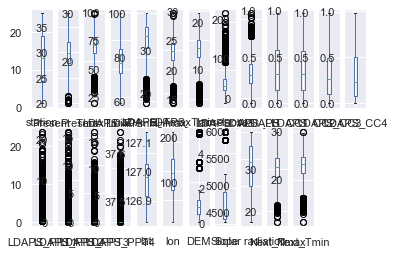

In [34]:
df.plot(kind='box',subplots=True, layout=(2,13))

We have outliers present in data that can be observed from the box plot above.

Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse, LDAPS_WS, LDAPS_LH, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4, DEM, Slope, Next_Tmax and Next_Tmin have outliers present. 

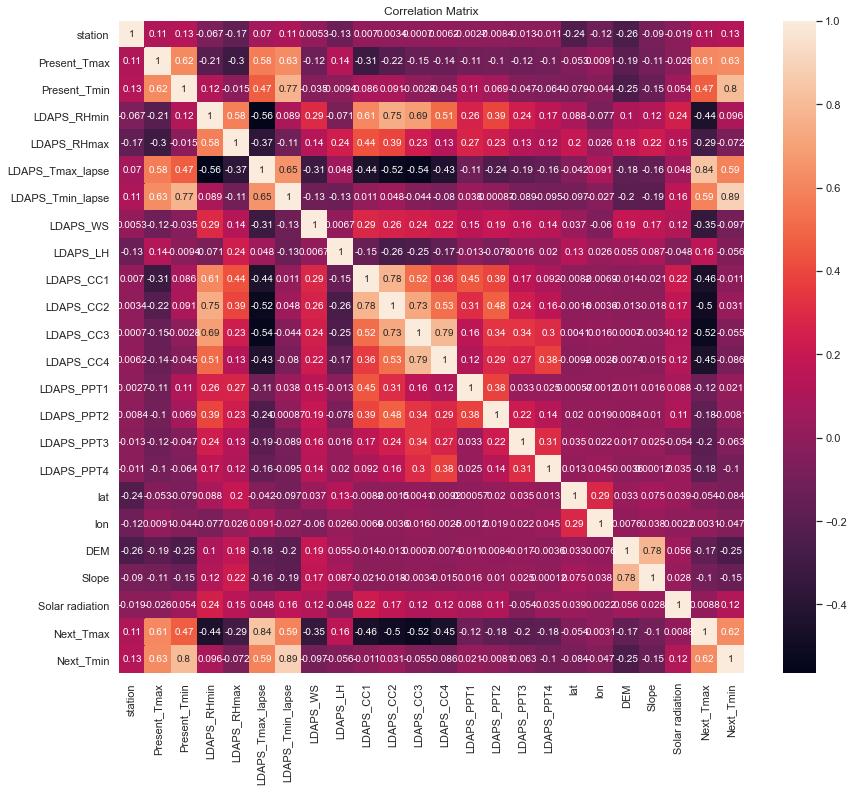

In [35]:
corr_mat=df.corr()
plt.figure(figsize=[14,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

We observe that Present_Tmax, Present_Tmin, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse are highly corelated with the output Next_Tmax and Next_Tmin. 
Also Next_Tmax is corelated directly with Next_Tmin.

In [36]:
df.fillna(0)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,0.0,0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [37]:
df.drop(["Date"],axis =1, inplace=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [38]:
df.isnull().sum()

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [39]:
df.fillna(0)

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,0.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Treating the missing vaukes with mode values

In [40]:
df['station']= df['station'].fillna(df['station'].mode()[0])

In [41]:
df['Present_Tmin']= df['Present_Tmin'].fillna(df['Present_Tmin'].mode()[0])
df['LDAPS_RHmin']= df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mode()[0])
df['LDAPS_RHmax']= df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mode()[0])
df['LDAPS_Tmax_lapse']= df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mode()[0])
df['LDAPS_Tmin_lapse']= df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mode()[0])
df['LDAPS_WS']= df['LDAPS_WS'].fillna(df['LDAPS_WS'].mode()[0])
df['LDAPS_LH']= df['LDAPS_LH'].fillna(df['LDAPS_LH'].mode()[0])
df['LDAPS_CC1']= df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mode()[0])
df['LDAPS_CC2']= df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mode()[0])
df['LDAPS_CC3']= df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mode()[0])
df['LDAPS_CC4']= df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mode()[0])
df['LDAPS_PPT1']= df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mode()[0])
df['LDAPS_PPT2']= df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mode()[0])
df['LDAPS_PPT3']= df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mode()[0])
df['LDAPS_PPT4']= df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mode()[0])
df['Next_Tmax']= df['Next_Tmax'].fillna(df['Next_Tmax'].mode()[0])
df['Next_Tmin']= df['Next_Tmin'].fillna(df['Next_Tmin'].mode()[0])
df['Present_Tmax']= df['Present_Tmax'].fillna(df['Present_Tmax'].mode()[0])



In [42]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

We could see that there are no missing values present in data set.

In [43]:
df.shape

(7752, 24)

# Model building

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x=df.iloc[:,:22]
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246


In [46]:
y=df.iloc[:,22:24]

In [47]:
y.head()

,Next_Tmax,Next_Tmin
0,29.1,21.2
1,30.5,22.5
2,31.1,23.9
3,31.7,24.3
4,31.2,22.5


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=22)   # spliting data in 2:8 ratio for test and train.

This is an example of Regression hence we will try to get the efficient regression models using linear, random forest and other

In [49]:
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

In [50]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [51]:
pred=lm.predict(x_test)
print('Prediction :',pred)
print('Actual value ', y_test)

Prediction : [[27.47515679 20.6953391 ]
 [33.48816172 25.58688309]
 [28.84226847 22.43296976]
 ...
 [26.82305741 22.51109148]
 [32.13573085 27.11267138]
 [32.44469363 23.05831099]]
Actual value        Next_Tmax  Next_Tmin
3527       31.4       21.8
2313       33.4       25.8
4956       29.8       22.7
3825       30.5       23.2
3628       32.5       25.0
...         ...        ...
2859       27.0       21.1
1668       29.5       21.7
7473       26.4       22.4
5772       33.3       28.3
1442       30.7       24.0

[1551 rows x 2 columns]


In [52]:
print('LinearRegression')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print("r2 score is ", r2_score(y_test,pred))                                    #LinearRegression  
print('Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('Mean squared error is ',mean_squared_error(y_test,pred))

LinearRegression
Mean absolute error: 1.0678639412676432
r2 score is  0.7336717849830706
Root mean Squared Error: 1.456930350313467
Mean squared error is  2.1226460456645215


In [53]:
print("lm_coefficeient is", lm.coef_)
print("lm_intercept is ", lm.intercept_)
print('Lm score is ',lm.score(x_train,y_train))

lm_coefficeient is [[ 1.45929121e-02  1.94490921e-01  2.12569835e-01  6.40412321e-03
  -2.85667464e-02  3.58522972e-01  4.82369984e-02 -2.29664163e-01
   3.47274059e-03 -1.20606658e+00 -1.04623974e+00 -1.55986103e+00
  -1.35357008e+00  3.67240477e-02  1.38670770e-01  3.28470741e-02
   3.13337614e-02 -2.23916758e-01 -1.01313100e+00 -2.76913932e-03
   1.55458831e-01  4.67155427e-04]
 [-3.40324015e-03  6.11390391e-02  3.98161392e-01  1.83300672e-03
  -1.63376002e-02 -1.30392714e-01  6.05113191e-01 -3.87451376e-02
  -2.25097461e-03 -5.27228113e-01  3.84239324e-02 -9.29889895e-01
  -4.36193915e-02 -1.86821566e-03 -2.62135368e-02  9.23375030e-02
  -3.60479926e-02 -1.18369044e-01 -9.66277015e-02 -6.51588566e-03
   2.27759588e-01  3.04384119e-04]]
lm_intercept is  [147.34752298  18.99641917]
Lm score is  0.763188639921835


In [54]:
from sklearn.model_selection  import cross_val_score as cvs
def cross_val(model_name,model,x,y,cv):
    
    scores = cvs(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

In [55]:
cross_val(lm,LinearRegression(),x,y,5)

LinearRegression() Scores:
0.63
0.56
0.68
0.73
0.74
Average LinearRegression() score: 0.6673


In [56]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

In [57]:
predrf=RF.predict(x_test)                                  # RandomForest
print('RF Prediction :',predrf)
print('Actual value ', y_test)

RF Prediction : [[27.98674525 21.49326422]
 [34.09866659 25.91701719]
 [29.61760923 22.57048243]
 ...
 [27.46506728 22.55758748]
 [31.44720021 25.51921862]
 [29.86086535 22.50096829]]
Actual value        Next_Tmax  Next_Tmin
3527       31.4       21.8
2313       33.4       25.8
4956       29.8       22.7
3825       30.5       23.2
3628       32.5       25.0
...         ...        ...
2859       27.0       21.1
1668       29.5       21.7
7473       26.4       22.4
5772       33.3       28.3
1442       30.7       24.0

[1551 rows x 2 columns]


In [58]:
print('RandomForestRegressor')
print('RF Mean absolute error:',mean_absolute_error(y_test,predrf))
print("RF r2 score is ", r2_score(y_test,predrf))
print('RF Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('RF Mean squared error is ',mean_squared_error(y_test,predrf))

RandomForestRegressor
RF Mean absolute error: 1.1103979955078773
RF r2 score is  0.7288717375009193
RF Root mean Squared Error: 1.4570698313534935
RF Mean squared error is  2.123052493440498


In [59]:
cross_val(RF,RandomForestRegressor(),x,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.65
0.61
0.71
0.82
0.74
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.7059


In [60]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.01)
#ls=Lasso(alpha=0.1) is adefault value
ls.fit(x_train,y_train)
print('Lasso Score is ',ls.score(x_train,y_train) )

Lasso Score is  0.7618536487274641


In [64]:

print('ls Mean absolute error:',mean_absolute_error(y_test,predrf))
print("ls r2 score is ", r2_score(y_test,predrf))
print('ls Root mean Squared Error:',np.sqrt(mean_squared_error(y_test,predrf)))
print('ls Mean squared error is ',mean_squared_error(y_test,predrf))

ls Mean absolute error: 1.1103979955078773
ls r2 score is  0.7288717375009193
ls Root mean Squared Error: 1.4570698313534935
ls Mean squared error is  2.123052493440498


In [74]:
print(cross_val_score(ls, x, y, cv=5))

[0.63208775 0.56526972 0.67913259 0.72218918 0.73833619]


From R2 score and cross validation result we conclude that Random forest is th ebest model.
Hence we will perform Hyper parameter tunning on the same.
r2 score -> coeffiecient of determination is the proportion of the variance in the dependent variable that is predicatable from the independent variable (s) i.e change coming in y whenever x is being changed

In [80]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [100]}

RF = RandomForestRegressor()
                     
                     
grid_search = GridSearchCV(estimator = RF, param_grid = param_grid, cv = 4, n_jobs = -1, verbose = 3)
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   8 | elapsed:   10.0s remaining:   10.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   19.1s finished


GridSearchCV(cv=4, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10],
                         'min_samples_leaf': [3], 'min_samples_split': [8],
                         'n_estimators': [100]},
             verbose=3)

In [81]:
RF_Root_mean_Squared_Error_GSV = np.sqrt(mean_squared_error(y_train, grid_search.predict(x_train)))
print('RF Root mean Squared Error GSV:',RF_Root_mean_Squared_Error_GSV )

RF Root mean Squared Error GSV: 0.7546520071452255


After tunning the random forest score is 0.7546 which has increase from 0.7288, this is significant optimization in our model hence we will save this model now.

In [82]:
import joblib
joblib.dump(grid_search,"Temperature.pkl")

['Temperature.pkl']